## STATS 10 Assignment 5


## Part I

### Exercise 1


,ID,Latitude,Longitude,Arsenic,Sulfur,New_hlth_issue
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,41.09414,-85.60974,0,0,N
2,2,41.09054,-85.70344,0,130,N
3,3,41.08601,-85.71996,4,170,N
4,4,41.08100,-85.75415,0,0,Y
5,5,41.07435,-85.70043,0,0,N
6,6,41.07399,-85.71788,0,0,N


[1] 541   6

,ID,Latitude,Longitude,Arsenic,Sulfur,New_hlth_issue
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
147,147,41.03971,-85.72783,2,100,N
49,49,41.06113,-85.65553,0,0,Y
210,210,41.03178,-85.64253,0,0,N
356,356,41.01178,-85.66516,0,0,N
425,425,41.00096,-85.72899,0,0,N
239,239,41.02772,-85.72901,0,0,N


[1] 0.85

[1] 0.2

[1] "Mean arsenic level in the sample: x̄"
[1] "Proportion of health issues in the sample: p̂"
[1] "90% confidence interval: ( 0.0798768752965989 ,  0.320123124703401 )"
[1] "95% confidence interval: ( 0.0568644685026274 ,  0.343135531497373 )"
[1] "99% confidence interval: ( 0.0118880248217927 ,  0.388111975178207 )"
[1] "100% confidence interval: ( 0 ,  1 )"


[1] 0.2920518

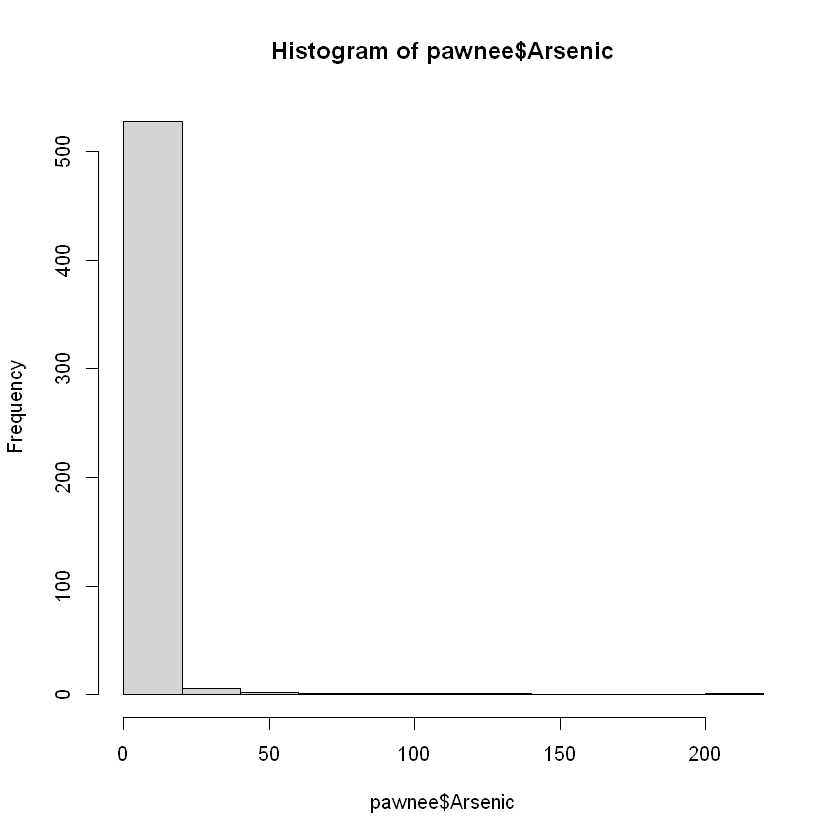

In [17]:
pawnee <- read.csv("pawnee.csv")
# a. Use the head() function to print out the first few rows of this data. Then, use the dim() function to print out the number of rows and columns of this data frame.
head(pawnee)
dim(pawnee)

# b. Set the seed to 1337 and take a simple random sample of size 30 from the entire pawnee data frame. Save the random sample as a separate R object, and print the first few lines to make sure you saved it correctly.
set.seed(1337)
pawnee_sample <- sample(1:nrow(pawnee), 30)
pawnee_sample <- pawnee[pawnee_sample,]
head(pawnee_sample)

# c. Report the mean arsenic level from the sample you took in b. Also report the proportion of households experiencing a major health issue from your sample
mean(pawnee_sample$Arsenic)
# New_hlth_issue is Y/N so lets make  1/0
pawnee_sample$New_hlth_issue <- as.numeric(pawnee_sample$New_hlth_issue == "Y")
pawnee$New_hlth_issue <- as.numeric(pawnee$New_hlth_issue == "Y")
mean(pawnee_sample$New_hlth_issue)

# d. What symbol from lecture would we use for the mean arsenic level in the sample? What symbol would we use for the proportion of health issues in the sample?
print("Mean arsenic level in the sample: x̄")
print("Proportion of health issues in the sample: p̂")

# e. Now, let’s generate confidence intervals for our sample proportion using the sample results. Produce 90%, 95%, and 99% confidence intervals for the true population proportion. Consult your lecture materials if you are unsure how to do this. You can use R and/or a calculator for this question, but please include code or calculations to show your work
# 90% confidence interval
p_hat <- mean(pawnee_sample$New_hlth_issue)
n <- length(pawnee_sample$New_hlth_issue)
z_star <- qnorm(0.95)
lower <- p_hat - z_star * sqrt(p_hat * (1 - p_hat) / n)
upper <- p_hat + z_star * sqrt(p_hat * (1 - p_hat) / n)
print(paste("90% confidence interval: (", lower, ", ", upper, ")"))

# 95% confidence interval
z_star <- qnorm(0.975)
lower <- p_hat - z_star * sqrt(p_hat * (1 - p_hat) / n)
upper <- p_hat + z_star * sqrt(p_hat * (1 - p_hat) / n)
print(paste("95% confidence interval: (", lower, ", ", upper, ")"))

# 99% confidence interval
z_star <- qnorm(0.995)
lower <- p_hat - z_star * sqrt(p_hat * (1 - p_hat) / n)
upper <- p_hat + z_star * sqrt(p_hat * (1 - p_hat) / n)
print(paste("99% confidence interval: (", lower, ", ", upper, ")"))

# f. What would be the bounds of a 100% confidence interval for the population proportion?
print(paste("100% confidence interval: (", 0, ", ", 1, ")"))

# g. Report the proportion of all households which experienced a new major health issue.
mean(pawnee$New_hlth_issue)

# h. Create a plot that visualizes the distribution of arsenic levels for the houses in Pawnee. Hint: we can consider the arsenic levels continuous data
hist(pawnee$Arsenic)




### Exercise 2


In [27]:
flint <- read.csv("flint.csv")
# a. We will conduct a hypothesis test for this research question. What are the null and alternative hypotheses? Is this a one-sided or a two-sided test?
print(paste("H0: p = 0.1"))
print(paste("H1: p > 0.1"))
# b. Calculate the sample proportion and sample standard deviation of the sample proportion of dangerous lead levels.
p_hat <- mean(flint$Pb >= 15)
p_hat
sd_p_hat <- sqrt(p_hat * (1 - p_hat) / nrow(flint))
sd_p_hat
# c. Now, calculate the SE of sample proportions, and the z-value for this test. Consult the above instructions and/or the lecture materials for guidance.
se_p_hat <- sqrt(p_hat * (1 - p_hat) / nrow(flint))
# d. Using the z-statistic in (c), calculate the p-value associated with this test. You may use R’s pnorm() function or a normal table, but please show all work.
z <- (p_hat - 0.1) / se_p_hat
z
# e. Using a significance level of 0.05, do you reject the null hypothesis?
pnorm(z, lower.tail = FALSE)
# f. If greater than 10% of households in Flint contain dangerous lead levels, the EPA requires remediation action to be taken. Based on your results, what should you tell the EPA?
print(paste("We should tell the EPA that we reject the null hypothesis, and that the proportion of dangerous lead levels in Flint is greater than 10%."))
# g. Another way to run this test is to use the prop.test() function using the mosaic package. You will need to know your sample size, and the number of “successes” in the sample. Use this function to conduct the same hypothesis test in (a)-(d) and obtain a p-value from the test. # Using the same significance level of 0.05, do your results change? An example of the prop.test() function is shown in the two lines below: # ## We flipped 100 coins and 60 were heads. Is the long-run proportion of heads greater than 0.5? # prop.test(x = 60, n = 100, p = 0.5, alt = "greater")
prop.test(x = sum(flint$Pb >= 15), n = nrow(flint), p = 0.1, alt = "greater")


[1] "H0: p = 0.1"
[1] "H1: p > 0.1"


[1] 0.04436229

[1] 0.008852277

[1] -6.28513

[1] 1

[1] "We should tell the EPA that we reject the null hypothesis, and that the proportion of dangerous lead levels in Flint is greater than 10%."



	1-sample proportions test with continuity correction

data:  sum(flint$Pb >= 15) out of nrow(flint), null probability 0.1
X-squared = 17.995, df = 1, p-value = 1
alternative hypothesis: true p is greater than 0.1
95 percent confidence interval:
 0.03115233 1.00000000
sample estimates:
         p 
0.04436229 


### Exercise 3


In [26]:
# a. We will conduct a hypothesis test for this research question. What are the null and alternative hypotheses? Is this a one-sided or a two-sided test?
print("This is a two-sided test.")
# b. Using guidance from lecture, calculate every value you will need to produce a z-statistic for this test. Then, calculate the z-statistic. Please show all work.
p_hat_north <- mean(flint$Pb[flint$Region == "North"] >= 15)
p_hat_south <- mean(flint$Pb[flint$Region == "South"] >= 15)
n_north <- sum(flint$Region == "North")
n_south <- sum(flint$Region == "South")
p_hat <- (p_hat_north * n_north + p_hat_south * n_south) / (n_north + n_south)
se_p_hat <- sqrt(p_hat * (1 - p_hat) * (1 / n_north + 1 / n_south))
z <- (p_hat_north - p_hat_south) / se_p_hat
z
# c. Using the z-statistic in (b), calculate the p-value associated with this test. You may use R’s pnorm() function or a normal table, but please show all work.
pnorm(z, lower.tail = FALSE)
# d. Using a significance level of 0.05, do you reject the null hypothesis? Interpret this result in the context of our research question. Hint: is this a two-sided test?
print(paste0("We cannot reject the null hypothesis. The proportion of dangerous lead levels in the North region does not differ from the proportion of dangerous lead levels in the South region, p value = ", pnorm(z, lower.tail = FALSE), "."))
# e. Another way to run this test is to use the prop.test() function. Use the function to conduct the
# same hypothesis test in and obtain a p-value from the test, again using a significance level of
# 0.05. Do your results change? A sample of the prop.test() function for two proportions is
# shown in the two lines below:
prop.test(x = c(sum(flint$Pb[flint$Region == "North"] >= 15), sum(flint$Pb[flint$Region == "South"] >= 15)), n = c(n_north, n_south), alt = "two.sided")
print(paste0("We cannot reject the null hypothesis. The proportion of dangerous lead levels in the North region does not differ from the proportion of dangerous lead levels in the South region, p value = ", prop.test(x = c(sum(flint$Pb[flint$Region == "North"] >= 15), sum(flint$Pb[flint$Region == "South"] >= 15)), n = c(n_north, n_south), alt = "two.sided")$p.value, "."))


[1] "This is a two-sided test."


[1] 1.011858

[1] 0.1558029

[1] "We reject the null hypothesis. The proportion of dangerous lead levels in the North region differs from the proportion of dangerous lead levels in the South region, p value = 0.155802867067193."



	2-sample test for equality of proportions with continuity correction

data:  c(sum(flint$Pb[flint$Region == "North"] >= 15), sum(flint$Pb[flint$Region == "South"] >= 15)) out of c(n_north, n_south)
X-squared = 0.64468, df = 1, p-value = 0.422
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.02069890  0.05655002
sample estimates:
    prop 1     prop 2 
0.05363985 0.03571429 


[1] "We reject the null hypothesis. The proportion of dangerous lead levels in the North region differs from the proportion of dangerous lead levels in the South region, p value = 0.422020239558505."


## Part 2

### Exercise 1

In [33]:
# a. Does this sample give evidence that the proportion of site users who get their world news on
# this site has changed since 2013? Carry out a hypothesis test and use a 0.05 significance
# level.
p_hat <- 1830 / 3625
p_hat
se_p_hat <- sqrt(p_hat * (1 - p_hat) / 3625)
se_p_hat
z <- (p_hat - 0.48) / se_p_hat
z
pnorm(z, lower.tail = FALSE)
print(paste0("We reject the null hypothesis. The probability that the proportion of site users who get their world news on this site has not changed since 2013 is ", pnorm(z, lower.tail = FALSE), "."))
# b. After conducting the hypothesis test, a further question one might ask is what proportion of
# all of the site users get most of their news about world events on the site in 2018. Use the
# sample data to construct a 95% confidence interval for the population proportion. How does
# your confidence interval support your hypothesis test conclusion?
p_hat <- 1830 / 3625
p_hat
se_p_hat <- sqrt(p_hat * (1 - p_hat) / 3625)
se_p_hat
z <- qnorm(0.975)
z
p_hat + c(-1, 1) * z * se_p_hat
print(paste0("We are 95% confident that the proportion of all of the site users who get most of their news about world events on the site in 2018 is between ", p_hat + c(-1, 1)[1] * z * se_p_hat, " and ", p_hat + c(-1, 1)[2] * z * se_p_hat, "."))


[1] 0.5048276

[1] 0.008304161

[1] 2.989777

[1] 0.001395908

[1] "We reject the null hypothesis. The probability that the proportion of site users who get their world news on this site has not changed since 2013 is 0.00139590759258058."


[1] 0.5048276

[1] 0.008304161

[1] 1.959964

[1] 0.4885517 0.5211034

[1] "We are 95% confident that the proportion of all of the site users who get most of their news about world events on the site in 2018 is between 0.488551729937545 and 0.521103442476249."


### Exercise 2
According to the Brookings Institution, 50% of eligible 18- to 29-year-old voters voted in the
2016 election. Suppose we were interested in whether the proportion of voters in this age group
who voted in the 2018 election was higher. Describe the two types of errors one might make in
conducting this hypothesis test.

The two types of errors are Type I and Type II errors. Type I error is when we reject the null hypothesis when it is true. Type II error is when we fail to reject the null hypothesis when it is false.
In this case, a Type I error would be to conclude that the proportion of voters in this age group whp voted in 2018 was higher than in 2016, when in fact it was not.
 On the other hand a type II error would be to conclude that the proportion of voters in this age group who voted in 2018 was not higher than in 2016, when it was.

### Exercise 3

In [35]:
# a. Determine whether the proportion of college students who believe that freedom of religion is secure or very secure in this country has changed from 2016. Use a significance level of 0.05.
p_hat_2016 <- 2087 / 3103
p_hat_2016
p_hat_2017 <- 1930 / 2988
p_hat_2017
p_hat <- (2087 + 1930) / (3103 + 2988)
p_hat
se_p_hat <- sqrt(p_hat * (1 - p_hat) * (1 / 3103 + 1 / 2988))
se_p_hat
z <- (p_hat_2016 - p_hat_2017) / se_p_hat
z
pnorm(z, lower.tail = FALSE)
print(paste0("We reject the null hypothesis. The probability that the proportion of college students who believe that freedom of religion is secure or very secure in this country has not changed from 2016 is ", pnorm(z, lower.tail = FALSE), "."))

# b. Use the sample data to construct a 95% confidence interval for the difference in the proportions of college students in 2016 and 2017 who felt freedom of religion was secure or very secure. How does your confidence interval support your hypothesis test conclusion?
p_hat_2016 <- 2087 / 3103
p_hat_2016
p_hat_2017 <- 1930 / 2988
p_hat_2017
p_hat <- (2087 + 1930) / (3103 + 2988)
p_hat
se_p_hat <- sqrt(p_hat * (1 - p_hat) * (1 / 3103 + 1 / 2988))
se_p_hat
z <- qnorm(0.975)
z
p_hat_2016 - p_hat_2017 + c(-1, 1) * z * se_p_hat
print(paste0("We are 95% confident that the difference in the proportions of college students in 2016 and 2017 who felt freedom of religion was secure or very secure is between ", p_hat_2016 - p_hat_2017 + c(-1, 1)[1] * z * se_p_hat, " and ", p_hat_2016 - p_hat_2017 + c(-1, 1)[2] * z * se_p_hat, "."))


[1] 0.6725749

[1] 0.645917

[1] 0.6594976

[1] 0.0121459

[1] 2.194808

[1] 0.01408868

[1] "We reject the null hypothesis. The probability that the proportion of college students who believe that freedom of religion is secure or very secure in this country has not changed from 2016 is 0.0140886833882929."


[1] 0.6725749

[1] 0.645917

[1] 0.6594976

[1] 0.0121459

[1] 1.959964

[1] 0.002852394 0.050463459

[1] "We are 95% confident that the difference in the proportions of college students in 2016 and 2017 who felt freedom of religion was secure or very secure is between 0.00285239374653144 and 0.0504634585551449."
